# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi.newsapi_client import NewsApiClient


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

from collections import Counter
from nltk import ngrams

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import spacy
from spacy import displacy

%matplotlib inline

load_dotenv()

C:\Users\Owner\anaconda3\envs\nlpenv\lib\site-packages\ipykernel\parentpoller.py:112: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Read your api key environment variable

api_key = os.getenv("NEWSAPI")

In [3]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=os.environ["NEWSAPI"])

In [4]:
# Fetch the Bitcoin news articles

bitcoin = newsapi.get_everything(q="bitcoin", sort_by="relevancy", language = "en")

In [5]:
# Fetch the Ethereum news articles

ethereum = newsapi.get_everything(q="ethereum", sort_by="relevancy", language = "en")

In [6]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(bitcoin_sentiments)
btc_df

,text,date,compound,positive,negative,neutral
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.061,0.882
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772
3,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.000,0.928
4,"As a kid, I remember when my father tried to u...",2022-05-16,0.3818,0.114,0.052,0.833
5,If youve ever felt like introducing some Vegas...,2022-05-05,0.7506,0.193,0.000,0.807
6,Cryptocurrency mixers are sometimes used to he...,2022-05-06,-0.4404,0.202,0.241,0.557
7,Photo Illustration by Grayson Blackmon / The V...,2022-05-24,-0.4767,0.000,0.103,0.897
8,Posted \r\nFrom Bitcoin's dramatic drop to a n...,2022-05-10,-0.3612,0.000,0.123,0.877
9,"May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",2022-05-11,-0.3818,0.000,0.077,0.923


In [7]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(ethereum_sentiments)
eth_df

,text,date,compound,positive,negative,neutral
0,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.000,0.865
1,GameStop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960
2,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879
3,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945
4,GameStop is going all-in on crypto. The video ...,2022-05-23,0.1280,0.046,0.000,0.954
5,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",2022-05-25,0.0258,0.034,0.000,0.966
6,There's a new metaverse project from the creat...,2022-05-01,-0.2732,0.000,0.063,0.937
7,Editorial IndependenceWe want to help you make...,2022-05-09,0.6908,0.178,0.000,0.822
8,"40 days ago Bitcoin sold for $47,454. It's pri...",2022-05-09,-0.6908,0.000,0.178,0.822
9,When Nvidia launched its Ampere Lite Hash Rate...,2022-05-15,-0.3818,0.069,0.085,0.847


In [8]:
# Describe the Bitcoin Sentiment

btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.119220,0.063350,0.084900,0.851800
std,0.404397,0.060985,0.075734,0.100743
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.386825,0.000000,0.057250,0.827000
50%,-0.284600,0.055000,0.071500,0.878000
75%,0.156025,0.085000,0.103750,0.923000
max,0.750600,0.202000,0.300000,0.964000


In [9]:
# Describe the Ethereum Sentiment

eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.088800,0.032800,0.048600,0.918700
std,0.343530,0.051042,0.043472,0.051321
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.284450,0.000000,0.000000,0.875500
50%,-0.153100,0.000000,0.050000,0.935000
75%,0.045025,0.051750,0.069000,0.955000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Bitcoin** has the highest mean positive score (0.059550) while the positive score for  Ethereum was 0.037850.

Q: Which coin had the highest compound score?

A: **Bitcoin** has the highest compound score with a max of 0.750600. Ethereum's max compound score is 0.690800.

Q. Which coin had the highest positive score?

A: **Bitcoin** has the highest positive score with a max of 0.202000, while Ethereum max positive score is 178000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk

In [11]:
# Instantiate the lemmatizer

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

import nltk
nltk.download('stopwords')

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = ['there', 'are', 'a', 'the', 'are', 'if', 'is', 'its', 'of', ]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    # Remove the punctuation from text
    re_clean = re.compile("[^a-zA-Z ]").sub('', text)
  
    # Create a tokenized list of the words
    words = word_tokenize(re_clean) 
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    lowercase_words = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw.union(sw_addon), words))
    
    return words
    #return lowercase_words

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.061,0.882,"[Bitcoin, mining, site, powered, otherwise, lo..."
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772,"[Warren, Buffett, always, bitcoin, skeptic, bi..."
3,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.000,0.928,"[Image, source, Getty, ImagesThe, value, Bitco..."
4,"As a kid, I remember when my father tried to u...",2022-05-16,0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.000,0.865,"[Meta, revealed, NFTs, work, Instagram, USbase..."
1,GameStop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960,"[GameStop, officially, thrown, headlong, web, ..."
2,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
3,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945,"[Bored, Ape, Yacht, Club, creators, Yuga, Labs..."
4,GameStop is going all-in on crypto. The video ...,2022-05-23,0.1280,0.046,0.000,0.954,"[GameStop, going, allin, crypto, video, game, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# tokenizer(btc_df.text.str.cat())
bitcoin_ngrams = ngrams(
    tokenizer(' '.join(btc_df['text'])),
    n=2,
)
#list(bitcoin_ngrams)[:5] 
Counter(bitcoin_ngrams).most_common(10)

[(('May', 'Reuters'), 5),
 (('Reuters', 'Bitcoin'), 4),
 (('chars', 'May'), 4),
 (('previous', 'closeBitcoin'), 3),
 (('closeBitcoin', 'worlds'), 3),
 (('worlds', 'biggest'), 3),
 (('biggest', 'bestknown'), 3),
 (('bestknown', 'cryptocurrency'), 3),
 (('new', 'blockchain'), 3),
 (('Seth', 'Greens'), 3)]

In [17]:
# Generate the Ethereum N-grams where N=2

ethereum_ngrams = ngrams(
    tokenizer(' '.join(eth_df['text'])),
    n=2,
)
# list(ethereum_ngrams)[:5] 
Counter(ethereum_ngrams).most_common(10)

[(('May', 'Reuters'), 4),
 (('chars', 'May'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('previous', 'closeBitcoin'), 3),
 (('closeBitcoin', 'worlds'), 3),
 (('worlds', 'biggest'), 3),
 (('biggest', 'bestknown'), 3),
 (('bestknown', 'cryptocurrency'), 3),
 (('chars', 'GameStop'), 2),
 (('Yacht', 'Club'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(btc_df.text.str.cat()), N=10)

[('cryptocurrency', 9),
 ('Bitcoin', 6),
 ('new', 6),
 ('Reuters', 5),
 ('worlds', 4),
 ('week', 4),
 ('stolen', 4),
 ('biggest', 4),
 ('charsMay', 4),
 ('luna', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(eth_df.text.str.cat()), N=10)

[('cryptocurrency', 11),
 ('Bitcoin', 6),
 ('NFT', 5),
 ('digital', 4),
 ('Ethereum', 4),
 ('biggest', 4),
 ('Reuters', 4),
 ('week', 4),
 ('worlds', 4),
 ('Monday', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

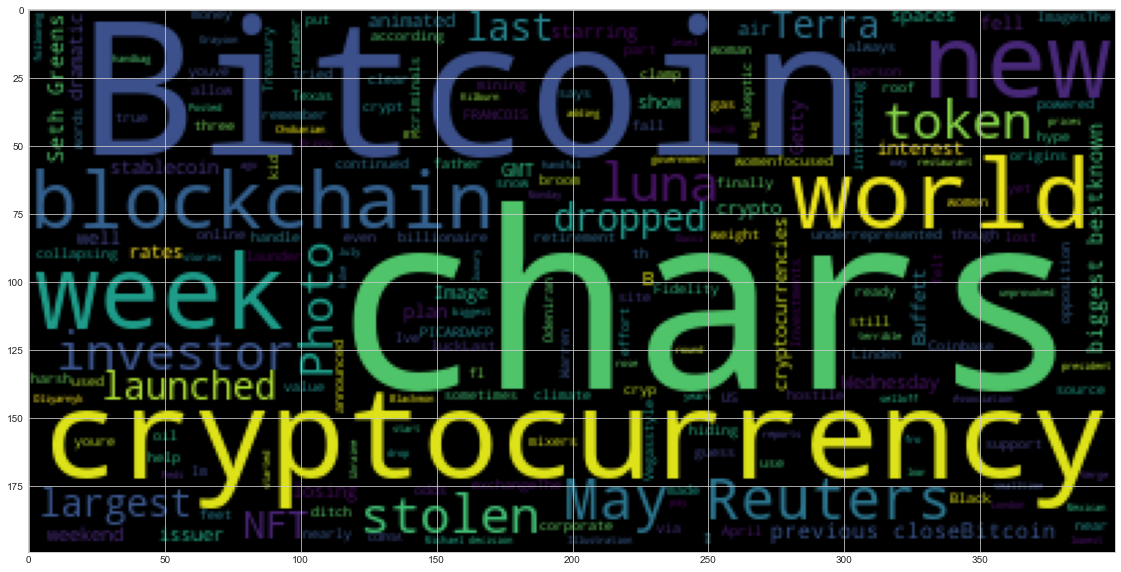

In [22]:
# Generate the Bitcoin word cloud

wc_btc = WordCloud().generate(' '.join(tokenizer(' '.join(btc_df['text']))))
plt.imshow(wc_btc);

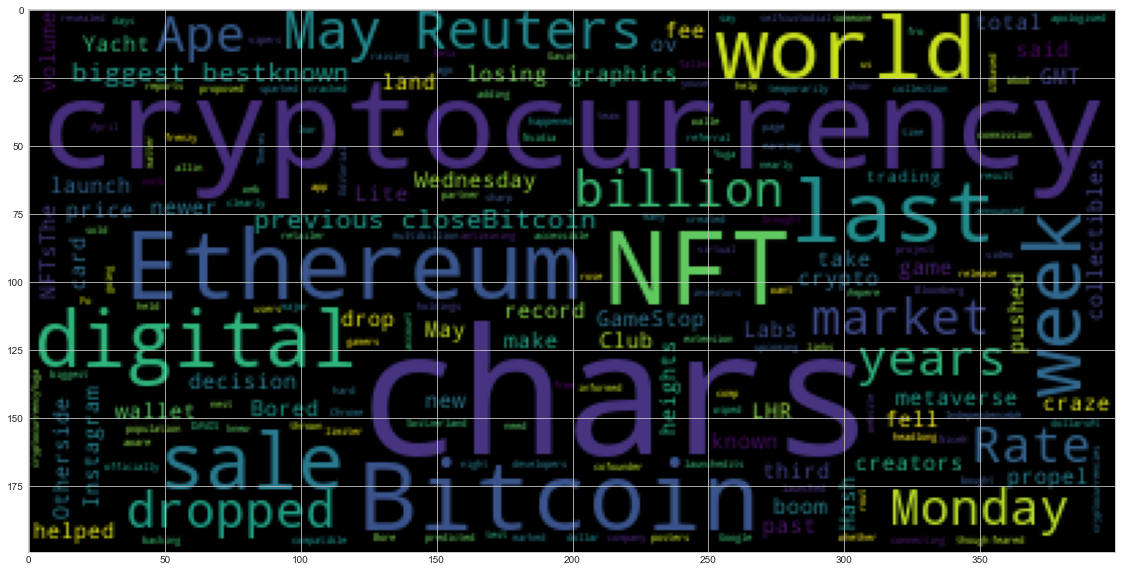

In [23]:
# Generate the Ethereum word cloud

wc_eth = WordCloud().generate(
    ' '.join(tokenizer(
        ' '.join(eth_df['text']))
    )
)
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_doc = ' '.join(btc_df['text'])

In [28]:
# Run the NER processor on all of the text
# btc_doc = nlp(str(btc_df['text']))
btc_doc = nlp(btc_doc)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin Ner'

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [30]:
# Render the visualization
# btc_html = displacy.render([btc_doc], style = "dep", jupyter=True)

In [31]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['Odeniran',
 'Linden',
 'Texas',
 'April 4th, 2022',
 'Photo',
 'FRANCOIS PICARD/AFP',
 'Getty Images',
 'Warren Buffett',
 'the weekend',
 'Getty Images\r\n',
 'the weekend',
 '34,000',
 '27,630',
 'Coinbase',
 '+2164',
 'nearly three feet',
 'Last week',
 'Fidelity Investments',
 'the US Treasury',
 'Grayson Blackmon',
 'Oliyarnyk / CC-BY-SA-4.0',
 'Michael Chobanian',
 'the Blockchain Association of Ukraine',
 'Bitcoin',
 'Gucci handbag',
 'week',
 'Kristy Kilburn',
 'May 11',
 'Reuters',
 '7.23%',
 '28,758.29',
 'GMT',
 'Wednesday',
 '2,241.68',
 '40.4%',
 'May 4',
 'Reuters',
 '5.7%',
 '39,862.84',
 'Wednesday',
 '2,102.94',
 '20.9%',
 'year',
 'last July',
 '33,000',
 'the week',
 'last week',
 'Fed',
 'May 9',
 'Reuters',
 '7.81%',
 '31,333.41',
 'GMT',
 'Monday',
 '2,655.98',
 '35%',
 'Mexican',
 'North London',
 'a few weeks ago',
 '+2779',
 'May 24',
 'Reuters',
 'its ninth week',
 'May 10',
 'Reuters',
 "Seth Green's",
 'NFT',
 'two',
 "Seth Green's",
 'Nike',
 'today',
 "S

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_doc = ' '.join(eth_df['text'])

In [33]:
# Run the NER processor on all of the text
# eth_doc = nlp(str(eth_df['text']))
eth_doc = nlp(eth_doc)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum Ner'

In [34]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [35]:
# Render the visualization
# eth_html = displacy.render([eth_doc], style = "dep", jupyter=True)

In [36]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['Meta',
 'Instagram',
 'US',
 'Instagram',
 'web3',
 'Ethereum',
 'Yuga Labs',
 'Yacht Club',
 'Yuga Labs',
 'Otherside NFT',
 'April 30',
 'NFT',
 '+6669',
 'Ethereum',
 'Monday',
 'Google Chrome',
 'Switzerland',
 'May 25',
 'Reuters',
 'Gavin Wood',
 'Last night',
 'Bloomberg',
 'nearly a third',
 'a billion dollars',
 '47,454',
 '34,007',
 '28%.About a third',
 'this week',
 'Nvidia',
 'Ampere Lite Hash Rate',
 'LHR',
 'Ethereum',
 'May 4',
 'Reuters',
 '5.7%',
 '39,862.84',
 'Wednesday',
 '2,102.94',
 '20.9%',
 'year',
 'May 11',
 'Reuters',
 '7.23%',
 '28,758.29',
 'GMT',
 'Wednesday',
 '2,241.68',
 '40.4%',
 'May 9',
 'Reuters',
 '7.81%',
 '31,333.41',
 'GMT',
 'Monday',
 '2,655.98',
 '35%',
 '9',
 '8',
 'Nvidia',
 'LHR',
 'last year\xa0',
 'NFT',
 'Ethereum',
 'Last week',
 'last July',
 '33,000',
 'the week',
 'last week',
 'Fed',
 'the past few years',
 'NFT',
 '$29 billion',
 'ApeCoin',
 '16%',
 'Monday',
 '14.60',
 'Getty Images\r\n',
 'the weekend',
 '34,000',
 '27,630',


---